<a href="https://colab.research.google.com/github/irham235/Projek-Machine-Learning/blob/main/Membuat_model_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files

# upload kaggle.json
uploaded = files.upload()

Saving kaggle (4).json to kaggle (4).json


In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d 'team-ai/spam-text-message-classification'

100% 208k/208k [00:00<00:00, 738kB/s]
100% 208k/208k [00:00<00:00, 737kB/s]


In [ ]:
import zipfile
dataset_zip = zipfile.ZipFile('spam-text-message-classification.zip', 'r')
dataset_zip.extractall()
dataset_zip.close()

In [ ]:
import pandas as pd
df = pd.read_csv('/content/SPAM text message 20170820 - Data.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
category = pd.get_dummies(df.Category)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='Category')
df_baru

,Message,ham,spam
0,"Go until jurong point, crazy.. Available only ...",1,0
1,Ok lar... Joking wif u oni...,1,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,0,1
3,U dun say so early hor... U c already then say...,1,0
4,"Nah I don't think he goes to usf, he lives aro...",1,0
...,...,...,...
5567,This is the 2nd time we have tried 2 contact u...,0,1
5568,Will ü b going to esplanade fr home?,1,0
5569,"Pity, * was in mood for that. So...any other s...",1,0
5570,The guy did some bitching but I acted like i'd...,1,0


mengubah nilai-nilai dari dataframe ke dalam tipe data numpy array menggunakan atribut values.

In [ ]:
pesan = df_baru['Message'].values
label = df_baru[['ham', 'spam']].values

bagi data untuk training dan data untuk testing

In [ ]:
from sklearn.model_selection import train_test_split
pesan_latih, pesan_test, label_latih, label_test = train_test_split(pesan, label, test_size=0.2)

ubah setiap kata pada dataset ke dalam bentuk bilangan numerik dengan fungsi tokenizer, setelah tokenisasi selesai lalu mengonversi setiap sampel menjadi sequence

In [ ]:
len(df_baru['Message'])

5572

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5572, oov_token='x')
tokenizer.fit_on_texts(pesan_latih)
tokenizer.fit_on_texts(pesan_test)

sekuens_latih = tokenizer.texts_to_sequences(pesan_latih)
sekuens_test = tokenizer.texts_to_sequences(pesan_test)

padded_latih = pad_sequences(sekuens_latih, maxlen=150)
padded_test = pad_sequences(sekuens_test, maxlen=150)

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dropout(0.5), # menambahkan dropout di regularisasi
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5), # menambahkan dropout di regularisasi
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.90 and logs.get('val_accuracy') > 0.90 ):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
history = model.fit(padded_latih, label_latih, epochs=50,
                    validation_data=(padded_test, label_test),
                    callbacks=[callbacks],
                    verbose=2)

Epoch 1/50
140/140 - 20s - loss: 0.3315 - accuracy: 0.8885 - val_loss: 0.0668 - val_accuracy: 0.9803 - 20s/epoch - 141ms/step
Epoch 2/50

Akurasi telah mencapai >90%!
140/140 - 6s - loss: 0.0503 - accuracy: 0.9872 - val_loss: 0.0477 - val_accuracy: 0.9865 - 6s/epoch - 42ms/step


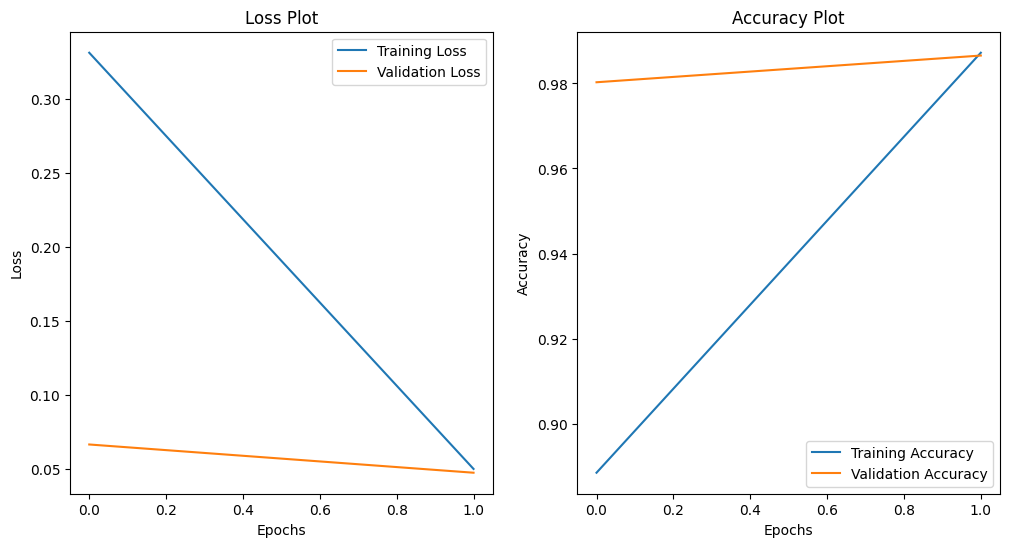

In [ ]:
import matplotlib.pyplot as plt
# Mendapatkan nilai loss dan akurasi dari history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Membuat plot loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss Plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Membuat plot akurasi
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Menampilkan plot
plt.show()